# Classification modeling for TRIBE2 CanCol 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [2]:
evaluation = {}

## Classification on dpfs using the best measure results
This regression analysis uses the 'best' mutations, as chosen based on the correlations previously computed.
For all regression models, we exclude patients whose disease has not progressed.

In [3]:
patients_log = pd.read_csv("TRIBE2_db.csv")
arm0_best_dataset = pd.read_csv("arm0_best_mutations.csv")
arm1_best_dataset = pd.read_csv("arm1_best_mutations.csv")

In [4]:
arm0_best_dataset["dpfs"] = arm0_best_dataset["dpfs"].map(lambda x: 0 if x < 365 else 1)
arm1_best_dataset["dpfs"] = arm1_best_dataset["dpfs"].map(lambda x: 0 if x < 365 else 1)

### Observing the data
As can be seen from the plots below, dpfs has a long tail so it would make sense to take its log and turn it into an approximately normal distribution.

In [5]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    arm0_best_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm0_best_dataset["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)
# Disabled for performance
# train_dataset = arm0_x_train.copy()
# train_dataset.insert(0, "dpfs", arm0_y_train)
# _ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

arm1_x, arm1_y = (
    arm1_best_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm1_best_dataset["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)
# Disabled for performance
# train_dataset = arm1_x_train.copy()
# train_dataset.insert(0, "dpfs", arm1_y_train)
# _ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

### SVC

In [6]:
from sklearn.svm import SVC
clf = SVC()
evaluation["best-svc"] = {}

#### arm0

In [7]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5535714285714285
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        28
           1       0.75      0.14      0.24        21

    accuracy                           0.61        49
   macro avg       0.68      0.55      0.49        49
weighted avg       0.66      0.61      0.53        49




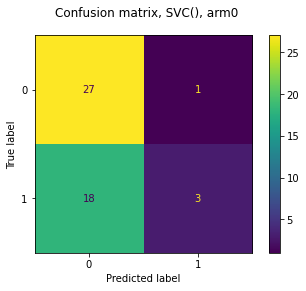

In [8]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["best-svc"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [9]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.5571428571428572
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        21
           1       0.57      0.40      0.47        20

    accuracy                           0.56        41
   macro avg       0.56      0.56      0.55        41
weighted avg       0.56      0.56      0.55        41




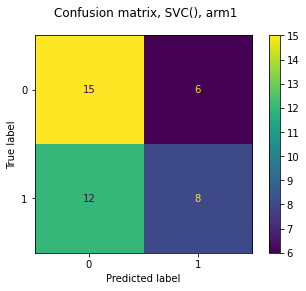

In [10]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["best-svc"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
evaluation["best-random-forest"] = {}

#### arm0

In [12]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5654761904761905
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        28
           1       0.62      0.24      0.34        21

    accuracy                           0.61        49
   macro avg       0.62      0.57      0.53        49
weighted avg       0.62      0.61      0.56        49




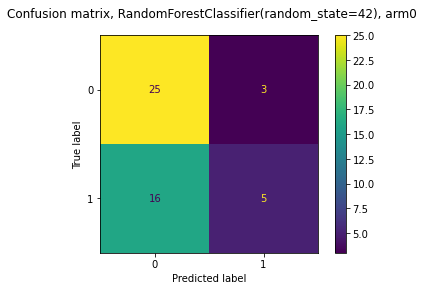

In [13]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["best-random-forest"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [14]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.5107142857142857
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.52      0.57      0.55        21
           1       0.50      0.45      0.47        20

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.51        41
weighted avg       0.51      0.51      0.51        41




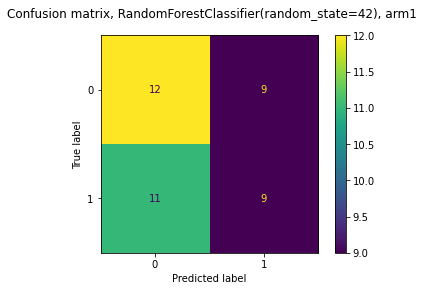

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["best-random-forest"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
evaluation["best-gaussian-nb"] = {}

#### arm0

In [17]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.47023809523809523
Report for GaussianNB(), arm0:
              precision    recall  f1-score   support

           0       0.33      0.04      0.06        28
           1       0.41      0.90      0.57        21

    accuracy                           0.41        49
   macro avg       0.37      0.47      0.32        49
weighted avg       0.37      0.41      0.28        49




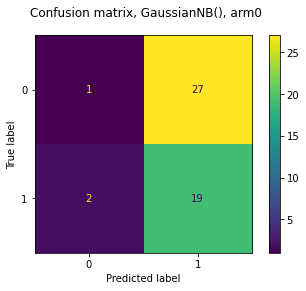

In [18]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["best-gaussian-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [19]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.47619047619047616
Report for GaussianNB(), arm1:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66        21
           1       0.00      0.00      0.00        20

    accuracy                           0.49        41
   macro avg       0.25      0.48      0.33        41
weighted avg       0.26      0.49      0.34        41




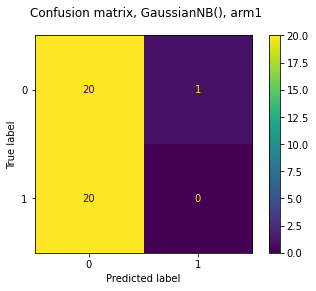

In [20]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["best-gaussian-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Bernoulli Naive Bayes

In [21]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
evaluation["best-bernoulli-nb"] = {}

#### arm0

In [22]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.45833333333333337
Report for BernoulliNB(), arm0:
              precision    recall  f1-score   support

           0       0.55      0.82      0.66        28
           1       0.29      0.10      0.14        21

    accuracy                           0.51        49
   macro avg       0.42      0.46      0.40        49
weighted avg       0.44      0.51      0.44        49




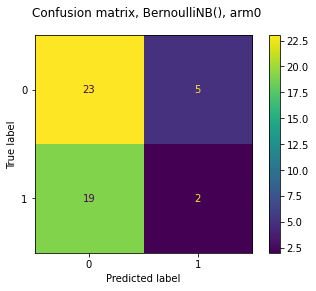

In [23]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["best-bernoulli-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [24]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.555952380952381
Report for BernoulliNB(), arm1:
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        21
           1       0.58      0.35      0.44        20

    accuracy                           0.56        41
   macro avg       0.57      0.56      0.54        41
weighted avg       0.57      0.56      0.54        41




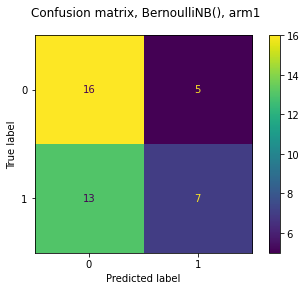

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["best-bernoulli-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

## Classification on dpfs using all mutation measures

In [26]:
arm0_all_dataset = pd.read_csv("arm0_all_mutations.csv")
arm1_all_dataset = pd.read_csv("arm1_all_mutations.csv")

In [27]:
arm0_all_dataset["dpfs"] = arm0_all_dataset["dpfs"].map(lambda x: 0 if x < 365 else 1)
arm1_all_dataset["dpfs"] = arm1_all_dataset["dpfs"].map(lambda x: 0 if x < 365 else 1)

In [28]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    arm0_all_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm0_all_dataset["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)

arm1_x, arm1_y = (
    arm1_all_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm1_all_dataset["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)

### SVC

In [29]:
from sklearn.svm import SVC
clf = SVC()
evaluation["all-svc"] = {}

#### arm0

In [30]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5238095238095238
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        28
           1       1.00      0.05      0.09        21

    accuracy                           0.59        49
   macro avg       0.79      0.52      0.41        49
weighted avg       0.76      0.59      0.46        49




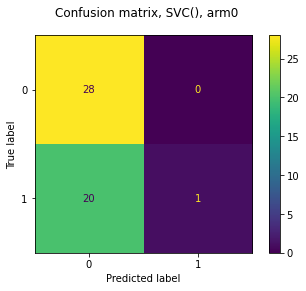

In [31]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["all-svc"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [32]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.5845238095238096
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.58      0.55      0.56        20

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.58        41




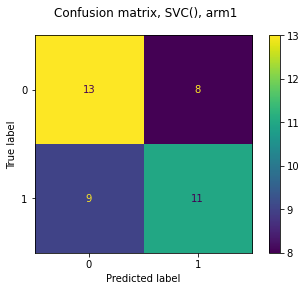

In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["all-svc"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.5
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.43      0.57      0.49        21

    accuracy                           0.49        49
   macro avg       0.50      0.50      0.49        49
weighted avg       0.51      0.49      0.49        49




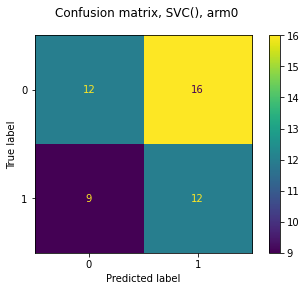

#### arm1, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.5845238095238096
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.58      0.55      0.56        20

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.58        41




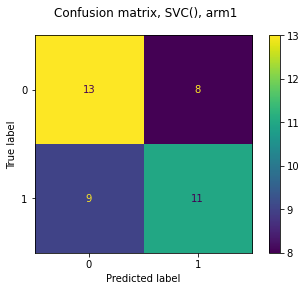

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["all-svc-rbf-cv"] = {}

hparams = [
    {
        "kernel": ["rbf"],
        "cache_size": [400],
        "gamma": np.logspace(-2, 2, 5),
        "C": [1e0, 1e1, 1e2, 1e3],
    }
]

cvmodel = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, SVC best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["all-svc-rbf-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, SVC best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["all-svc-rbf-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
evaluation["all-random-forest"] = {}

#### arm0

In [36]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5476190476190477
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        28
           1       0.56      0.24      0.33        21

    accuracy                           0.59        49
   macro avg       0.58      0.55      0.52        49
weighted avg       0.58      0.59      0.55        49




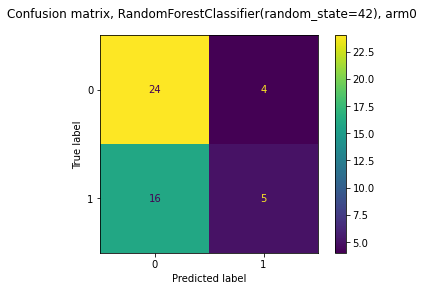

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["all-random-forest"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [38]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.6107142857142857
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.59      0.65      0.62        20

    accuracy                           0.61        41
   macro avg       0.61      0.61      0.61        41
weighted avg       0.61      0.61      0.61        41




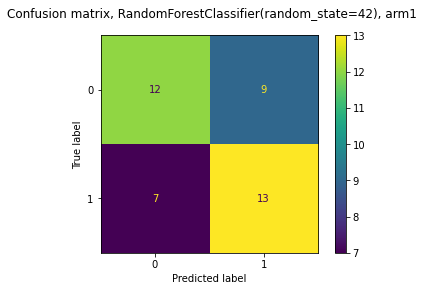

In [39]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["all-random-forest"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.4523809523809524
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        28
           1       0.38      0.48      0.43        21

    accuracy                           0.45        49
   macro avg       0.45      0.45      0.45        49
weighted avg       0.46      0.45      0.45        49




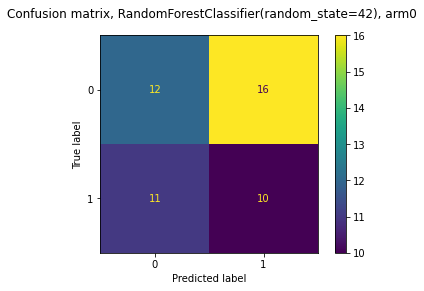

#### arm1, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.6107142857142857
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.59      0.65      0.62        20

    accuracy                           0.61        41
   macro avg       0.61      0.61      0.61        41
weighted avg       0.61      0.61      0.61        41




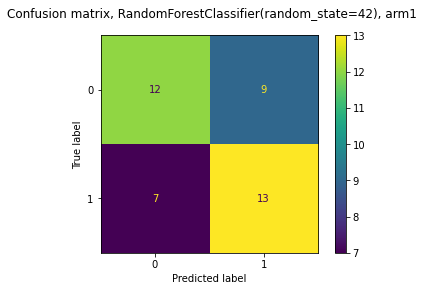

In [40]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["all-random-forest-cv"] = {}

hparams = [
    {
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt"],
        "max_depth": [int(x) for x in np.linspace(8, 110, num=15)] + [None],
        "min_samples_split": [2, 5, 7, 10],
        "min_samples_leaf": [1, 2, 4],
    }
]
model = RandomForestClassifier()

cvmodel = RandomizedSearchCV(
    estimator=model,
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, random forest best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["all-random-forest-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, random forest best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["all-random-forest-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
evaluation["all-gaussian-nb"] = {}

#### arm0

In [42]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.4821428571428571
Report for GaussianNB(), arm0:
              precision    recall  f1-score   support

           0       0.50      0.11      0.18        28
           1       0.42      0.86      0.56        21

    accuracy                           0.43        49
   macro avg       0.46      0.48      0.37        49
weighted avg       0.47      0.43      0.34        49




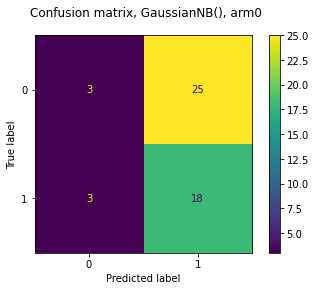

In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["all-gaussian-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [44]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.47619047619047616
Report for GaussianNB(), arm1:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66        21
           1       0.00      0.00      0.00        20

    accuracy                           0.49        41
   macro avg       0.25      0.48      0.33        41
weighted avg       0.26      0.49      0.34        41




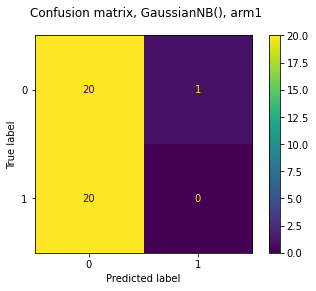

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["all-gaussian-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Bernoulli Naive Bayes

In [46]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
evaluation["all-bernoulli-nb"] = {}

#### arm0

In [47]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5178571428571428
Report for BernoulliNB(), arm0:
              precision    recall  f1-score   support

           0       0.58      0.75      0.66        28
           1       0.46      0.29      0.35        21

    accuracy                           0.55        49
   macro avg       0.52      0.52      0.50        49
weighted avg       0.53      0.55      0.53        49




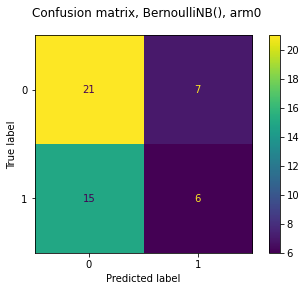

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["all-bernoulli-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [49]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.6321428571428571
Report for BernoulliNB(), arm1:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.65      0.55      0.59        20

    accuracy                           0.63        41
   macro avg       0.64      0.63      0.63        41
weighted avg       0.64      0.63      0.63        41




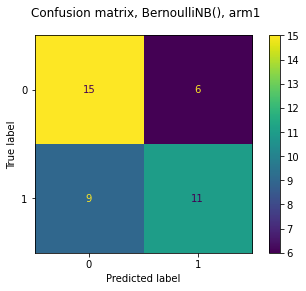

In [50]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["all-bernoulli-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

## Classification on dpfs with the patients' clinical information
Now for a different course of action: let's try to build a model on top of clinical parameters, which can later be combined with the pathway mutations for (hopefully) better results.

In [51]:
clinical = pd.read_csv("TRIBE2_db.csv")
clinical_a0 = clinical[(clinical["arm"] == 0)][
    [
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
        "dpfs",
    ]
]
clinical_a1 = clinical[(clinical["arm"] == 1)][
    [
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
        "dpfs",
    ]
]

# Dataset contains null values, encoded in all sort of ways..
clinical_a0 = clinical_a0[
    (clinical_a0["tstag"] != -99)
    & (clinical_a0["nstag"] != -99)
    & (clinical_a0["tstag"] != -99)
    & (clinical_a0["liver"] != -99)
    & (clinical_a0["lung"] != -99)
    & (clinical_a0["peritoneum"] != -99)
    & (clinical_a0["other"] != -99)
    & (clinical_a0["ras"].isin([0, 1]))
    & (clinical_a0["braf"].isin([0, 1]))
]
clinical_a1 = clinical_a1[
    (clinical_a1["tstag"] != -99)
    & (clinical_a1["nstag"] != -99)
    & (clinical_a1["tstag"] != -99)
    & (clinical_a1["liver"] != -99)
    & (clinical_a1["lung"] != -99)
    & (clinical_a1["peritoneum"] != -99)
    & (clinical_a1["other"] != -99)
    & (clinical_a1["ras"].isin([0, 1]))
    & (clinical_a1["braf"].isin([0, 1]))
]

In [52]:
clinical_a0["dpfs"] = clinical_a0["dpfs"].map(lambda x: 0 if x < 365 else 1)
clinical_a1["dpfs"] = clinical_a1["dpfs"].map(lambda x: 0 if x < 365 else 1)

In [53]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    clinical_a0.drop("dpfs", axis="columns"),
    clinical_a0["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)

arm1_x, arm1_y = (
    clinical_a1.drop("dpfs", axis="columns"),
    clinical_a1["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)

### SVC

In [54]:
from sklearn.svm import SVC
clf = SVC()
evaluation["clinical-svc"] = {}

#### arm0

In [55]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.00      0.00      0.00        19

    accuracy                           0.58        45
   macro avg       0.29      0.50      0.37        45
weighted avg       0.33      0.58      0.42        45




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


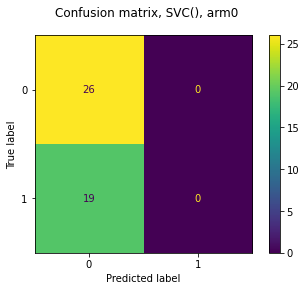

In [56]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-svc"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [57]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.5
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.46      1.00      0.63        17

    accuracy                           0.46        37
   macro avg       0.23      0.50      0.31        37
weighted avg       0.21      0.46      0.29        37




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


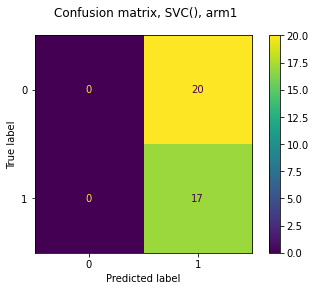

In [58]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-svc"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.5
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.42      1.00      0.59        19

    accuracy                           0.42        45
   macro avg       0.21      0.50      0.30        45
weighted avg       0.18      0.42      0.25        45




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


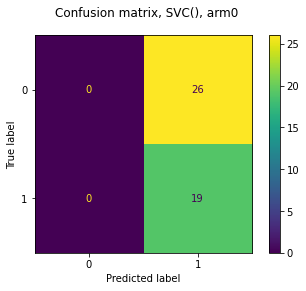

#### arm1, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.5
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.46      1.00      0.63        17

    accuracy                           0.46        37
   macro avg       0.23      0.50      0.31        37
weighted avg       0.21      0.46      0.29        37




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


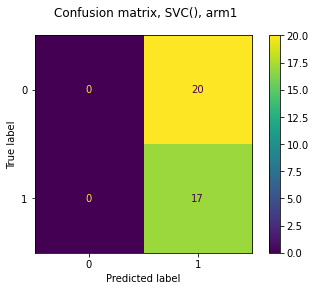

In [59]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["clinical-svc-rbf-cv"] = {}

hparams = [
    {
        "kernel": ["rbf"],
        "cache_size": [400],
        "gamma": np.logspace(-2, 2, 5),
        "C": [1e0, 1e1, 1e2, 1e3],
    }
]

cvmodel = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, SVC best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["clinical-svc-rbf-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, SVC best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["clinical-svc-rbf-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
evaluation["clinical-random-forest"] = {}

#### arm0

In [61]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.6143724696356275
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.62      0.42      0.50        19

    accuracy                           0.64        45
   macro avg       0.64      0.61      0.61        45
weighted avg       0.64      0.64      0.63        45




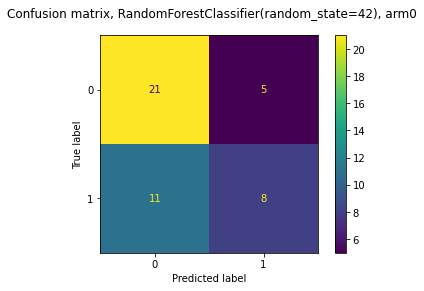

In [62]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-random-forest"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [63]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.46911764705882353
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        20
           1       0.43      0.59      0.50        17

    accuracy                           0.46        37
   macro avg       0.47      0.47      0.46        37
weighted avg       0.47      0.46      0.45        37




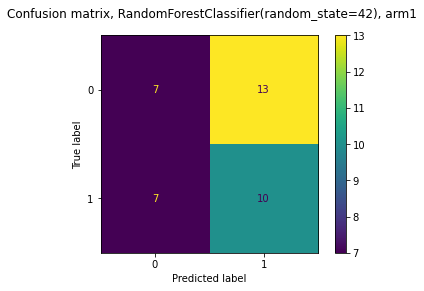

In [64]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-random-forest"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.6255060728744939
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        26
           1       0.52      0.79      0.62        19

    accuracy                           0.60        45
   macro avg       0.63      0.63      0.60        45
weighted avg       0.65      0.60      0.59        45




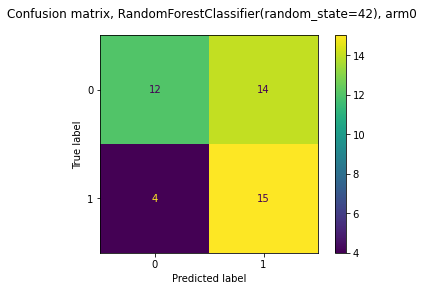

#### arm1, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.46911764705882353
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        20
           1       0.43      0.59      0.50        17

    accuracy                           0.46        37
   macro avg       0.47      0.47      0.46        37
weighted avg       0.47      0.46      0.45        37




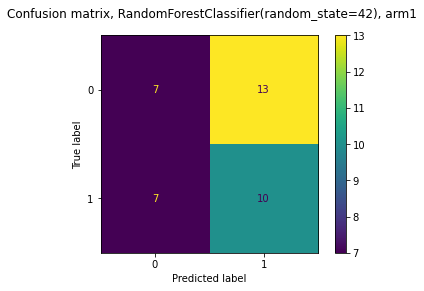

In [65]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["clinical-random-forest-cv"] = {}

hparams = [
    {
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt"],
        "max_depth": [int(x) for x in np.linspace(8, 110, num=15)] + [None],
        "min_samples_split": [2, 5, 7, 10],
        "min_samples_leaf": [1, 2, 4],
    }
]
model = RandomForestClassifier()

cvmodel = RandomizedSearchCV(
    estimator=model,
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, random forest best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["clinical-random-forest-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, random forest best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["clinical-random-forest-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Gaussian Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
evaluation["clinical-gaussian-nb"] = {}

#### arm0

In [67]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5779352226720648
Report for GaussianNB(), arm0:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        26
           1       0.50      0.58      0.54        19

    accuracy                           0.58        45
   macro avg       0.58      0.58      0.57        45
weighted avg       0.59      0.58      0.58        45




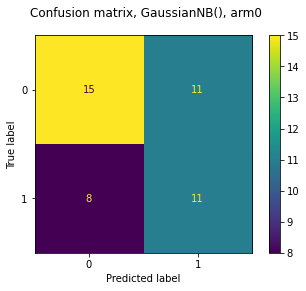

In [68]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-gaussian-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [69]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.41911764705882354
Report for GaussianNB(), arm1:
              precision    recall  f1-score   support

           0       0.42      0.25      0.31        20
           1       0.40      0.59      0.48        17

    accuracy                           0.41        37
   macro avg       0.41      0.42      0.39        37
weighted avg       0.41      0.41      0.39        37




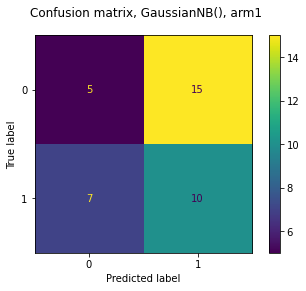

In [70]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-gaussian-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Bernoulli Naive Bayes

In [71]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
evaluation["clinical-bernoulli-nb"] = {}

#### arm0

In [72]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.43724696356275294
Report for BernoulliNB(), arm0:
              precision    recall  f1-score   support

           0       0.54      0.77      0.63        26
           1       0.25      0.11      0.15        19

    accuracy                           0.49        45
   macro avg       0.40      0.44      0.39        45
weighted avg       0.42      0.49      0.43        45




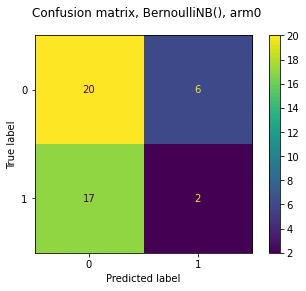

In [73]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-bernoulli-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [74]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.5029411764705882
Report for BernoulliNB(), arm1:
              precision    recall  f1-score   support

           0       0.55      0.30      0.39        20
           1       0.46      0.71      0.56        17

    accuracy                           0.49        37
   macro avg       0.50      0.50      0.47        37
weighted avg       0.51      0.49      0.47        37




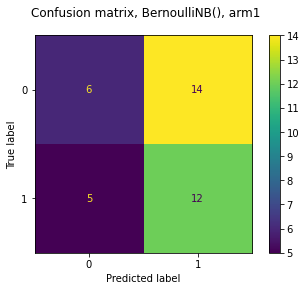

In [75]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-bernoulli-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

## Classification on dpfs using all measure results, factoring in clinical data

In [76]:
temp_a0 = clinical[(clinical["arm"] == 0)][
    [
        "PatientFirstName",
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
    ]
]
temp_a1 = clinical[(clinical["arm"] == 1)][
    [
        "PatientFirstName",
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
    ]
]

# Dataset contains null values, encoded in all sort of ways..
temp_a0 = temp_a0[
    (temp_a0["tstag"] != -99)
    & (temp_a0["nstag"] != -99)
    & (temp_a0["tstag"] != -99)
    & (temp_a0["liver"] != -99)
    & (temp_a0["lung"] != -99)
    & (temp_a0["peritoneum"] != -99)
    & (temp_a0["other"] != -99)
    & (temp_a0["ras"].isin([0, 1]))
    & (temp_a0["braf"].isin([0, 1]))
]
temp_a1 = temp_a1[
    (temp_a1["tstag"] != -99)
    & (temp_a1["nstag"] != -99)
    & (temp_a1["tstag"] != -99)
    & (temp_a1["liver"] != -99)
    & (temp_a1["lung"] != -99)
    & (temp_a1["peritoneum"] != -99)
    & (temp_a1["other"] != -99)
    & (temp_a1["ras"].isin([0, 1]))
    & (temp_a1["braf"].isin([0, 1]))
]

ca0_dataset = temp_a0.join(
    arm0_all_dataset.set_index("PatientFirstName"), on="PatientFirstName"
)
ca1_dataset = temp_a1.join(
    arm1_all_dataset.set_index("PatientFirstName"), on="PatientFirstName"
)

In [77]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    ca0_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    ca0_dataset["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)

arm1_x, arm1_y = (
    ca1_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    ca1_dataset["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)

### SVC

In [78]:
from sklearn.svm import SVC
clf = SVC()
evaluation["clinical-all-svc"] = {}

#### arm0

In [79]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.00      0.00      0.00        19

    accuracy                           0.58        45
   macro avg       0.29      0.50      0.37        45
weighted avg       0.33      0.58      0.42        45




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


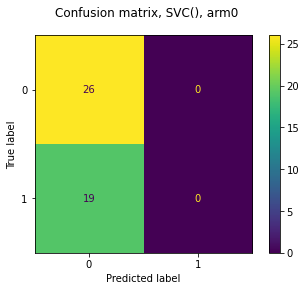

In [80]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-all-svc"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [81]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.47058823529411764
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.44      0.94      0.60        17

    accuracy                           0.43        37
   macro avg       0.22      0.47      0.30        37
weighted avg       0.20      0.43      0.28        37




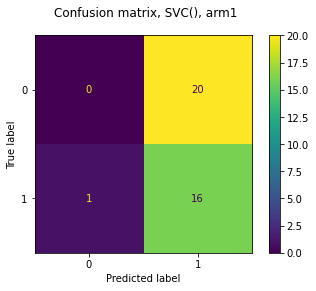

In [82]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-all-svc"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.5
Report for SVC(), arm0:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.42      1.00      0.59        19

    accuracy                           0.42        45
   macro avg       0.21      0.50      0.30        45
weighted avg       0.18      0.42      0.25        45




/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


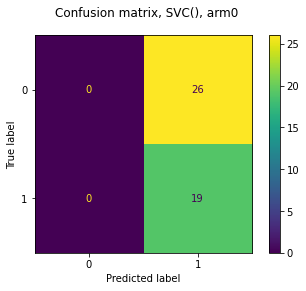

#### arm1, SVC best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.47058823529411764
Report for SVC(), arm1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.44      0.94      0.60        17

    accuracy                           0.43        37
   macro avg       0.22      0.47      0.30        37
weighted avg       0.20      0.43      0.28        37




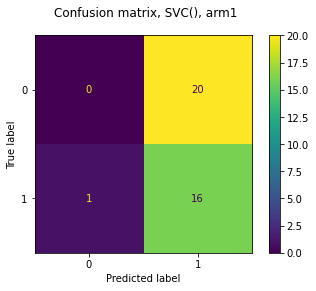

In [83]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["clinical-all-svc-rbf-cv"] = {}

hparams = [
    {
        "kernel": ["rbf"],
        "cache_size": [400],
        "gamma": np.logspace(-2, 2, 5),
        "C": [1e0, 1e1, 1e2, 1e3],
    }
]

cvmodel = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, SVC best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["clinical-all-svc-rbf-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, SVC best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["clinical-all-svc-rbf-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
evaluation["clinical-all-random-forest"] = {}

#### arm0

In [85]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.4251012145748988
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        26
           1       0.27      0.16      0.20        19

    accuracy                           0.47        45
   macro avg       0.40      0.43      0.40        45
weighted avg       0.42      0.47      0.43        45




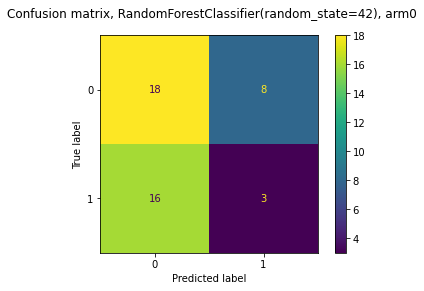

In [86]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-all-random-forest"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [87]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.43529411764705883
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        20
           1       0.40      0.47      0.43        17

    accuracy                           0.43        37
   macro avg       0.44      0.44      0.43        37
weighted avg       0.44      0.43      0.43        37




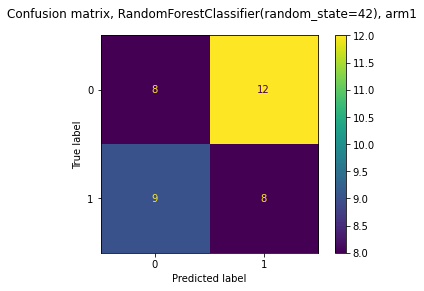

In [88]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-all-random-forest"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

----
#### arm0, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.45344129554655865
Report for RandomForestClassifier(random_state=42), arm0:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        26
           1       0.37      0.37      0.37        19

    accuracy                           0.47        45
   macro avg       0.45      0.45      0.45        45
weighted avg       0.47      0.47      0.47        45




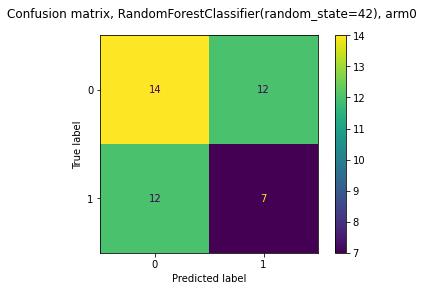

#### arm1, random forest best hyperparams

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AUC: 0.43529411764705883
Report for RandomForestClassifier(random_state=42), arm1:
              precision    recall  f1-score   support

           0       0.47      0.40      0.43        20
           1       0.40      0.47      0.43        17

    accuracy                           0.43        37
   macro avg       0.44      0.44      0.43        37
weighted avg       0.44      0.43      0.43        37




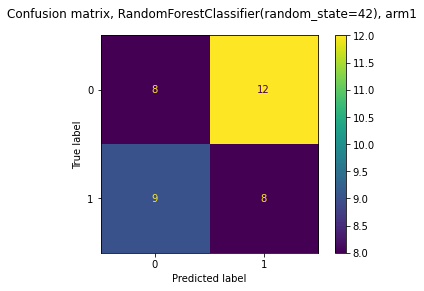

In [89]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import median_absolute_error, r2_score
from IPython.display import display, Markdown

evaluation["clinical-all-random-forest-cv"] = {}

hparams = [
    {
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt"],
        "max_depth": [int(x) for x in np.linspace(8, 110, num=15)] + [None],
        "min_samples_split": [2, 5, 7, 10],
        "min_samples_leaf": [1, 2, 4],
    }
]
model = RandomForestClassifier()

cvmodel = RandomizedSearchCV(
    estimator=model,
    param_distributions=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
display(Markdown("----\n#### arm0, random forest best hyperparams"))

_ = cvmodel.fit(arm0_x_train, arm0_y_train)

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")
plt.show()
evaluation["clinical-all-random-forest-cv"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

display(Markdown("#### arm1, random forest best hyperparams"))

_ = cvmodel.fit(arm1_x_train, arm1_y_train)
predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")
plt.show()
evaluation["clinical-all-random-forest-cv"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Gaussian Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
evaluation["clinical-all-gaussian-nb"] = {}

#### arm0

In [91]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.5860323886639677
Report for GaussianNB(), arm0:
              precision    recall  f1-score   support

           0       0.62      0.96      0.76        26
           1       0.80      0.21      0.33        19

    accuracy                           0.64        45
   macro avg       0.71      0.59      0.55        45
weighted avg       0.70      0.64      0.58        45




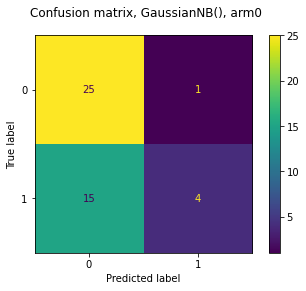

In [92]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-all-gaussian-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [93]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.4
Report for GaussianNB(), arm1:
              precision    recall  f1-score   support

           0       0.48      0.80      0.60        20
           1       0.00      0.00      0.00        17

    accuracy                           0.43        37
   macro avg       0.24      0.40      0.30        37
weighted avg       0.26      0.43      0.33        37




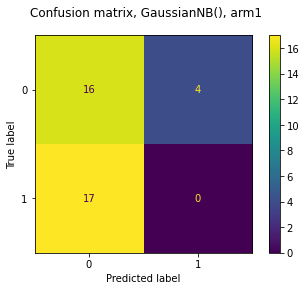

In [94]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-all-gaussian-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

### Bernoulli Naive Bayes

In [95]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
evaluation["clinical-all-bernoulli-nb"] = {}

#### arm0

In [96]:
_ = clf.fit(arm0_x_train, arm0_y_train)

AUC: 0.4919028340080972
Report for BernoulliNB(), arm0:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        26
           1       0.41      0.37      0.39        19

    accuracy                           0.51        45
   macro avg       0.49      0.49      0.49        45
weighted avg       0.50      0.51      0.51        45




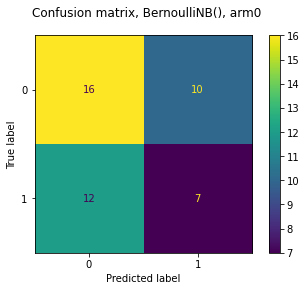

In [97]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm0_x_test)
print("AUC:", roc_auc_score(arm0_y_test, predict))
print(f"Report for {clf}, arm0:\n"
      f"{classification_report(arm0_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm0_x_test, arm0_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm0")

plt.show()

evaluation["clinical-all-bernoulli-nb"]["arm0"] = (roc_auc_score(arm0_y_test, predict),  f1_score(arm0_y_test, predict))

#### arm1

In [98]:
_ = clf.fit(arm1_x_train, arm1_y_train)

AUC: 0.6279411764705883
Report for BernoulliNB(), arm1:
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.57      0.71      0.63        17

    accuracy                           0.62        37
   macro avg       0.63      0.63      0.62        37
weighted avg       0.63      0.62      0.62        37




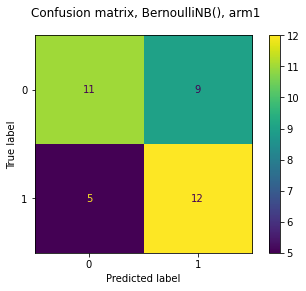

In [99]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, f1_score

predict = clf.predict(arm1_x_test)
print("AUC:", roc_auc_score(arm1_y_test, predict))
print(f"Report for {clf}, arm1:\n"
      f"{classification_report(arm1_y_test, predict)}\n")

disp = plot_confusion_matrix(clf, arm1_x_test, arm1_y_test)
disp.figure_.suptitle(f"Confusion matrix, {clf}, arm1")

plt.show()

evaluation["clinical-all-bernoulli-nb"]["arm1"] = (roc_auc_score(arm1_y_test, predict),  f1_score(arm1_y_test, predict))

--------

In [100]:
from IPython.display import display, Markdown

mk_table = """
----
## Recap of classification results
| Name | arm0 auc, f-score | arm1 auc, f-score |
| - | :-: | :-: |
"""

table_line = "| **{name}** | {a0auc:.6f} {a0f:.6f} | {a1auc:.6f} {a1f:.6f} |\n"

for model in evaluation:
    mk_table += table_line.format(
        name=model,
        a0auc=evaluation[model]["arm0"][0],
        a0f=evaluation[model]["arm0"][1],
        a1auc=evaluation[model]["arm1"][0],
        a1f=evaluation[model]["arm1"][1],
    )

display(Markdown(mk_table))


----
## Recap of classification results
| Name | arm0 auc, f-score | arm1 auc, f-score |
| - | :-: | :-: |
| **best-svc** | 0.553571 0.240000 | 0.557143 0.470588 |
| **best-random-forest** | 0.565476 0.344828 | 0.510714 0.473684 |
| **best-gaussian-nb** | 0.470238 0.567164 | 0.476190 0.000000 |
| **best-bernoulli-nb** | 0.458333 0.142857 | 0.555952 0.437500 |
| **all-svc** | 0.523810 0.090909 | 0.584524 0.564103 |
| **all-svc-rbf-cv** | 0.500000 0.489796 | 0.584524 0.564103 |
| **all-random-forest** | 0.547619 0.333333 | 0.610714 0.619048 |
| **all-random-forest-cv** | 0.452381 0.425532 | 0.610714 0.619048 |
| **all-gaussian-nb** | 0.482143 0.562500 | 0.476190 0.000000 |
| **all-bernoulli-nb** | 0.517857 0.352941 | 0.632143 0.594595 |
| **clinical-svc** | 0.500000 0.000000 | 0.500000 0.629630 |
| **clinical-svc-rbf-cv** | 0.500000 0.593750 | 0.500000 0.629630 |
| **clinical-random-forest** | 0.614372 0.500000 | 0.469118 0.500000 |
| **clinical-random-forest-cv** | 0.625506 0.625000 | 0.469118 0.500000 |
| **clinical-gaussian-nb** | 0.577935 0.536585 | 0.419118 0.476190 |
| **clinical-bernoulli-nb** | 0.437247 0.148148 | 0.502941 0.558140 |
| **clinical-all-svc** | 0.500000 0.000000 | 0.470588 0.603774 |
| **clinical-all-svc-rbf-cv** | 0.500000 0.593750 | 0.470588 0.603774 |
| **clinical-all-random-forest** | 0.425101 0.200000 | 0.435294 0.432432 |
| **clinical-all-random-forest-cv** | 0.453441 0.368421 | 0.435294 0.432432 |
| **clinical-all-gaussian-nb** | 0.586032 0.333333 | 0.400000 0.000000 |
| **clinical-all-bernoulli-nb** | 0.491903 0.388889 | 0.627941 0.631579 |
